## Problem Statement

#### The Public relations department team has collected extensive data on their customers such as product reviews. Based on the reviews(in text format), the team would like to predict whether their customers are satisfied with their product or not.

* Natural Language Processing can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy or not.
* NLP work by converting words into numbers and training a machine learning models to make predictions.
* That way, you can automatically know if your customers are happy or not without manually going through massive number of tweets or reviews!

step of NLP

1.Removing Punctuations

3.Removing Stopwords

4.Tokenization(Count Vectorization)

5.TF-IDF

### importing the liabrarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_df = pd.read_csv('amazon_alexa.tsv',sep='\t')
amazon_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
amazon_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [4]:
amazon_df.shape

(3150, 5)

### value_counts()

In [5]:
amazon_df.rating.value_counts()

# rating are top 5 gives 2286 out of 3150
# rating lowest 1 gives 161 out of 3150

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [6]:
amazon_df.variation.value_counts()
# Black Dot are 516 
# Charcol Fabric are 430

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [7]:
amazon_df.verified_reviews.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              79
Love it!                                                                                                                                                                                                                                                                               

In [8]:
amazon_df.feedback.value_counts()

# Positiva feedback gives customers are 2893 out of 3150
# Negitive feedback gives customer are 257 out of 3150

1    2893
0     257
Name: feedback, dtype: int64

In [9]:
for col in list(amazon_df):
    print(col,'--->',amazon_df[col].nunique())

rating ---> 5
date ---> 77
variation ---> 16
verified_reviews ---> 2301
feedback ---> 2


### checking the missing values

In [10]:
amazon_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

<AxesSubplot:>

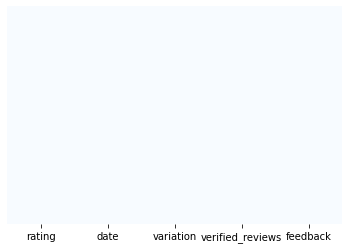

In [11]:
import seaborn as sns
sns.heatmap(amazon_df.isnull(), cmap='Blues', cbar=False, yticklabels=False)

### here verified_reviews column is importent so we need to explore more to count the no of word in the each value and create a new column

In [12]:
amazon_df['length'] = amazon_df['verified_reviews'].apply(len)
amazon_df[:5]

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
amazon_df.length.describe()

# average is 133
# max is 2851 word is single comment

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [14]:
# lets check the max comment values
amazon_df[amazon_df['length'] == 2851]['verified_reviews']

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>],
       [<AxesSubplot:title={'center':'length'}>, <AxesSubplot:>]],
      dtype=object)

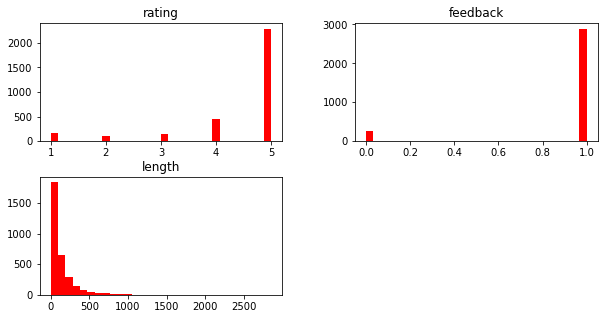

In [15]:

amazon_df.hist(bins=30,figsize=(10,5),color='r',grid=False)

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

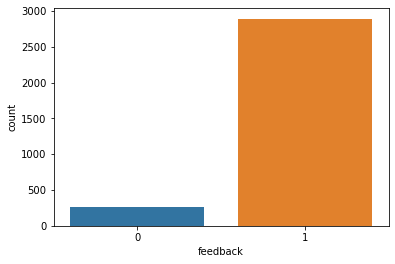

In [16]:
sns.countplot(amazon_df['feedback'])

#### observation : feedback is positive gives customers are nearly 3000 members,negitive gives customers are less than 300 members

### so lets divide the feedback into positive and negitive

In [17]:
positive = amazon_df[amazon_df['feedback'] == 1]
len(positive)

2893

In [18]:
negitive = amazon_df[amazon_df['feedback'] == 0]
len(negitive)

257

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

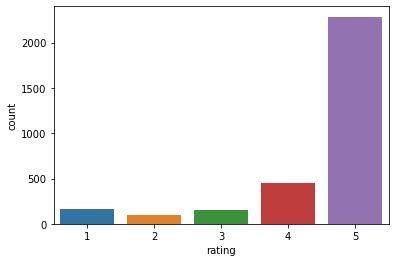

In [19]:
sns.countplot(amazon_df['rating'])

#### observation : rating are 5 is in top almost 2300.remaining all 4,3,2,1 rating less than 500.

<AxesSubplot:xlabel='variation', ylabel='rating'>

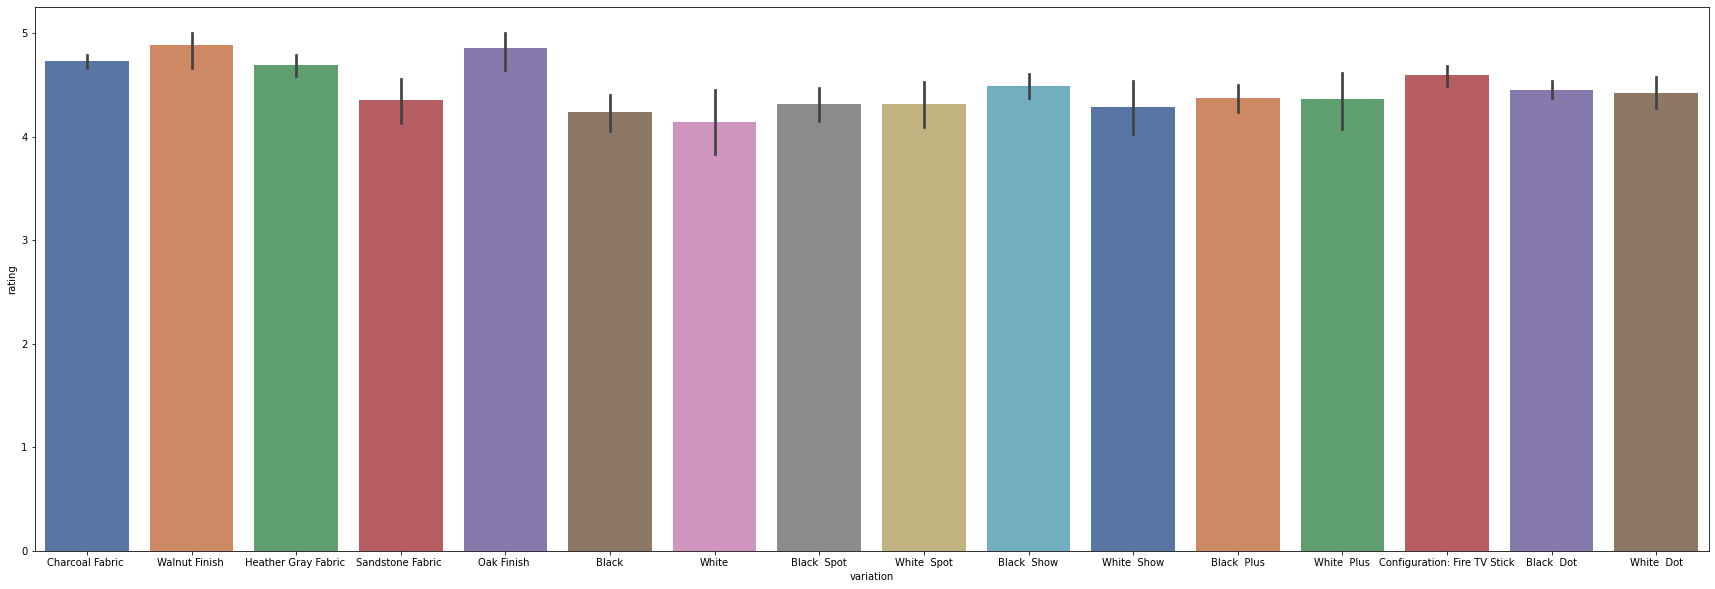

In [20]:
plt.figure(figsize = (30,10))
sns.barplot(x = 'variation', y='rating', data = amazon_df, palette = 'deep')

### Word Cloud

In [21]:
# all verified_reviews form in a list format
# tolist() - all verified_reviews column values is convert into single list values

sentence = amazon_df['verified_reviews'].tolist()
len(sentence)

3150

In [22]:
print(sentence)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [23]:
# all list values in combined in a single line
# all list values is convert into single string values

sentences_as_one_string =" ".join(sentence)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

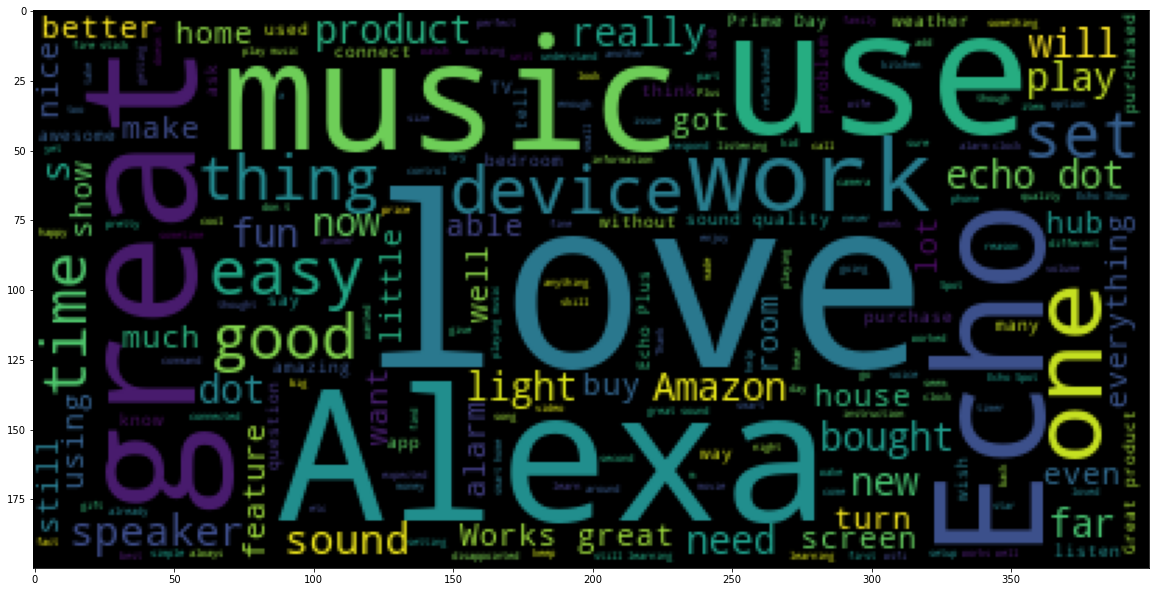

In [24]:
from wordcloud import WordCloud
# wordcloud is to be cloud the all values in a image format

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [25]:
# seperate negative verified_reviews listed out the list format
negative_list = negitive['verified_reviews'].tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

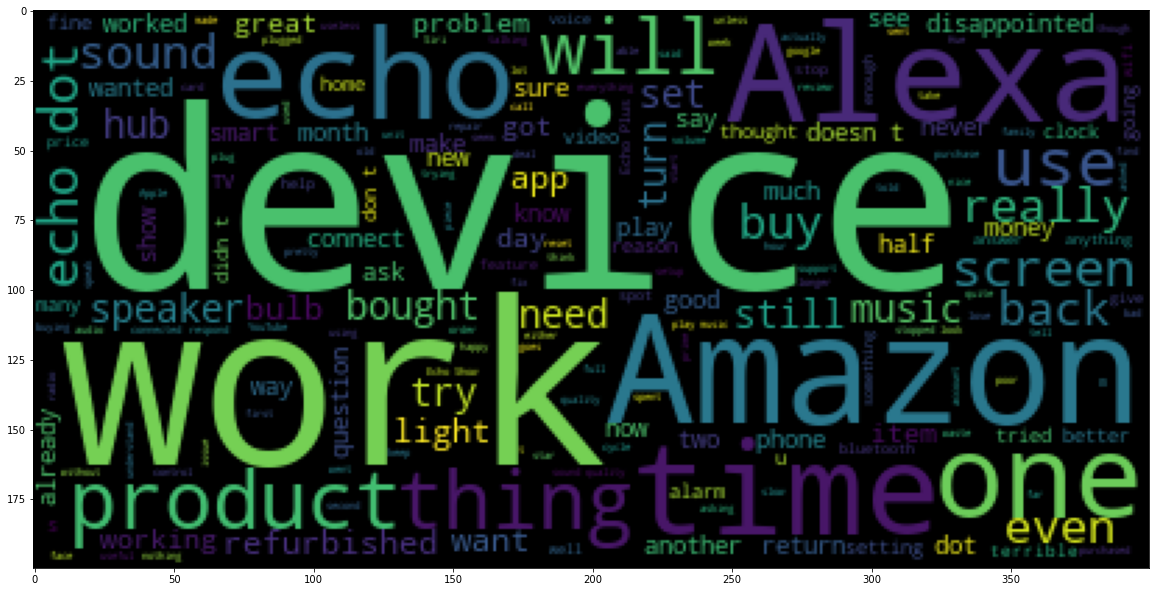

In [26]:
negative_sentences_as_one_string = " ".join(negative_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [27]:
amazon_df[:4]

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172


#### in given dataset unwanted columns are rating, date, length

In [28]:
amazon_df.drop(['rating','date','length'],axis=1,inplace=True)
amazon_df[:2]

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1


### Encoding()

#### get_Dummies()

In [29]:
# create the dummy variables
dummy = pd.get_dummies(amazon_df['variation'],drop_first=True)
dummy[:4]

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
# drop the variation column and concatinate the dummy and amazon_df columns

amazon_df.drop(['variation'],axis=1,inplace=True)
amazon_df[:4]


,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1


In [31]:
amazon_data = pd.concat([amazon_df,dummy],axis=1)

In [32]:
amazon_data[:4]

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### removing Punctuation

In [33]:
# Punctuation is the method to checking the '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' this values and using this function to remove the Punctuations

import string
string.punctuation

# this are the punctuation string we need to removing the data 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### removing Stopword

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
# lets we are going to list comprehensive

def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_stopwords = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_stopwords

In [37]:
# Let's test the newly added function

df_clean = amazon_df['verified_reviews'].apply(message_cleaning)

In [38]:
len(df_clean)

3150

In [39]:
print(df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [40]:
df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
reviews_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [42]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [43]:
print(reviews_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
reviews_countvectorizer.shape

(3150, 4044)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [46]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [47]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
reviews_countvectorizer.shape

(3150, 5211)

In [49]:
# first let's drop the column
amazon_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [50]:
# Now let's concatenate them together
df = pd.concat([amazon_df, reviews], axis=1)

In [51]:
df

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Let's drop the target label coloumns
x = df.drop(['feedback'],axis=1)

In [53]:
y = df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

### Splitting the dataset into train and test data

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

### Confusion Matrix and Classification Report

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

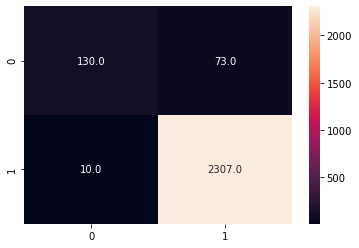

In [57]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True,fmt='.1f')

In [58]:
from sklearn.metrics import accuracy_score
y_pred = NB_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9174603174603174

<AxesSubplot:>

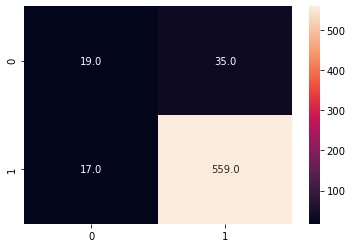

In [59]:
# Predicting the Test set results

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='.1f')

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.35      0.42        54
           1       0.94      0.97      0.96       576

    accuracy                           0.92       630
   macro avg       0.73      0.66      0.69       630
weighted avg       0.91      0.92      0.91       630



In [2]:
# accuracy
# (TP+TF)/(TP+FP+FN+TN)
(19+559)/(19+35+17+559)

0.9174603174603174

In [7]:
# precision
# TP/TP+FP
precision =559/(559+17)
precision

0.9704861111111112

In [8]:
# reccall
# TP/(TP+FN)
recall = 559/(559+35)
recall

0.9410774410774411

In [9]:
# F!-Score
# (2* preision * recall)/(precision + recall)
(2*precision*recall)/(precision+recall)

0.9555555555555555

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print('Accuracy : ',( 100 * accuracy_score(y_pred, y_test)))

Accuracy :  93.4920634920635


<AxesSubplot:>

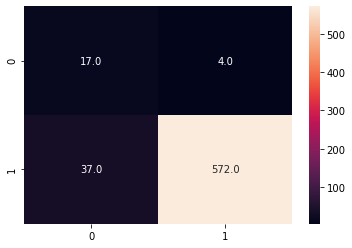

In [65]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True,fmt='.1f')